# Курс "Введение в анализ данных и машинное обучение"

Курс разбит на пять дней, каждый из дней содержит по шесть блоков. В каждом блоке - три раздела:
- Теоретическое введение,
- Практический пример,
- Заключение.

По дням коротко:
1. Вводный и обзорный день,
2. Разведочный анализ данных и задачи "обучения с учителем" на примерах `scikit-learn`,
3. Задачи "обучения без учителя" и одномерные временные ряды,
4. Нейросети, устройство и применение (изображения, тексты, многомерные временные данные),
5. Методы интерпретации и презентации моделей + два бонусных факультативных раздела курса.

# День первый, обзорный
И сегодня нас ждут следующие темы:
1. Определения и примеры,
2. Элементы теории вероятностей и математической статистики,
3. Об инструментарии: `jupyter lab` и `python`,
4. Как делаются исследования в сфере анализа данных, процесс,
5. Немного о том, почему машинное обучение вообще работает,
6. Обзор дальнейших разделов курса на примерах результатов.

# 1.1 Определения алгоритма, модели, метрик и задач машинного обучения

Формальные определения требуют владения серьезным математическим аппаратом. Мы попробуем обойтись без этого.

Самое первое, из того что нам понадобится, это понятие **датасета** (или *набора данных*). Это прямоугольная таблица значений, каждая строка которой называется **пример**, или же **sample**, а каждая колонка - **признак** или, что то же самое, **feature**.

Индекс примера   | Признак_1 | Признак_2 | Признак_3 | Признак_4 | Признак_5 |
-----------------|-----------|-----------|-----------|-----------|-----------|
 1               | 10        | 20        | "строка 1"| True      | 3.1415926 |   
 2               | 15        | 10        | "строка 2"| False     | 2.71      |
 3               | 12        | 40        | "строка 3"| False     | -1.12345  |

Для **задач обучения с учителем**, один выбранный признак - вся колонка - объявляется как **целевая величина**, или **target** (часто обозначают как `y`), оставшиеся признаки мы так и будем называть признаками (features), их часто обозначают как `X`. 

> В задаче обучения с учителем, необходимо предсказывать целевую величину с помощью входных признаков. Она называется "с учителем", потому что для ряда примеров у нас есть правильные ответы, и на них можно "научиться" предсказывать.
> 
> Для **задач обучения без учителя** - правильных ответов нет, и задача исследователя - найти некоторые полезные структуры в данных. 

Что позволяет научиться машине предсказывать ответы или исследовать данные? 
Снова обойдемся без очень формальных определений, так как приведенные ниже определения сконструированы именно под этот курс.

1. **Модель** - это функция, которая принимает одно или более значений на входе, выдаёт значения на выходе (чаще всего одно - предсказание целевой величины),
2. **Метрика** - это число, получаемое в результате сравнения известных правильных ответов, и тех, которыми отвечает модель. Иногда это можно называть ошибкой модели,
3. **Алгоритм** - это инструкции, которые принимают на вход данные, а выдают на выходе *модель*.

> В машинном обучении существует множество заготовленных *алгоритмов*, которые позволяют *по данным* строить *модели* так, чтобы *ошибка модели* была насколько это возможно меньше.

![Model Diagram](media/diagram_model.svg)

По типу значений *целевого признака* при обучении с учителем, задачи делят на как минимум следующие:
1. Регрессия - когда целевой признак, это любое вещественное число (с запятой), например рост, вес, количество денег,
2. Классификация - когда целевой признак принимает значения из заранее заданного множества (да/нет, собака/кошка/лошадь/...).

## Пример

Давайте рассмотрим пример алгоритма, модели и метрики. В этом разделе уже пойдет код, вдаваться в детали которого мы пока не будем, но в этом же лекционном дне далее станет ясно, что в нём происходит.

> Представим себе ситуацию, когда мы случайно попадаем на необитаемый остров, и видим незнакомый нам фрукт. С легкой руки назовём *мангустин*. Мы попробовали 10 таких фруктов, и составили таблицу.
> 
> Для каждого мангустина, мы некоторым образом знаем его размер в сантиметрах и вес в граммах, а также вкусный он или нет (да/нет).

In [8]:
%matplotlib inline
# магическая команда для отображения диаграмм в jupyter-тетрадках

# импорт библиотек
import numpy as np # библиотека для удобной работы с массивами
import pandas as pd # библиотека для удобной работы с датасетами

import seaborn as sns # библиотека для отображения диаграмм

# создадим наш датасет и наполним его синтетическими данными
dataset = pd.DataFrame({
    'weight': np.linspace(50, 125, 10), # 10 записей от 50 до 125
    'radius': np.linspace(0.5, 3.5, 10), # еще десять записей,
    'tasty': [False] * 4 + [True, False] + [True] * 4 # наш целевой признак
})

dataset

,weight,radius,tasty
0,50.000000,0.500000,False
1,58.333333,0.833333,False
2,66.666667,1.166667,False
3,75.000000,1.500000,False
4,83.333333,1.833333,True
5,91.666667,2.166667,False
6,100.000000,2.500000,True
7,108.333333,2.833333,True
8,116.666667,3.166667,True
9,125.000000,3.500000,True


Все наши знания о мангустинах приведены в этой таблице. Нам надо использовать некоторый алгоритм, который создаст модель для предсказания по размеру и весу - будет ли мангустин вкусным.
Сначала отобразим наши данные на плоскости, возможно это позволит сделать некоторые предположения.

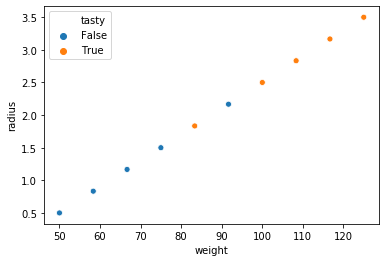

In [9]:
sns.scatterplot(x="weight", y="radius", hue="tasty", data=dataset); # зададим что по осям и что брать за цвет

Уже из данной диаграммы видно, что чем больше размер и вес, тем мангустин ***обычно*** вкуснее, но есть и исключения. Мы не будем особо мудрствовать, и используем следующий метод для построения модели

1. Модель - пусть это функция `tasty = f(weight, radius) > threshold = weight * a + radius * b > threshold`, где `a`, `b`, и `threshold` - называются параметрами,
2. Метрика (ошибка модели) - количество *неправильно* классифицированных примеров,

Алгоритм будет следующим: 
- `a = (max(weight) - min(weight)) / количество записей`, 
- `b = (max(radius) - min(radius)) / количество записей`,
- `threshold` находится перебором с шагом 1 по всем записям, лучшим считается тот, который дает минимум нашей метрике.

In [14]:
# наша арифметическая модель
def model(weight, radius, a, b, threshold):
    return weight * a + b * radius > threshold

# подсчет метрики как суммы несовпадающих ответов
# True соответствует 1, False соответствует 0
def metric(y_true, y_predicted):
    return sum(y_true != y_predicted)

def algorithm_create_model(data):
    # здесь .max и .min - это всей колонке нашей таблицы
    a = (data.weight.max() - data.weight.min()) / len(data)
    b = (data.radius.max() - data.radius.min()) / len(data)
    
    best_metric = np.inf # инициализируем бесконечностью
    best_threshold = None
    
    # перебор будем вести до максимума значений до сравнения
    model_maximum = data.weight.max() * a + b * data.radius.max()
    
    for threshold in np.arange(0, model_maximum, 1.):
        y_predicted = []
        for index in range(len(data)):
            predicted = model(
                data.weight.values[index],
                data.radius.values[index],
                a, b, threshold
            )
            y_predicted.append(predicted)
        current_metric = metric(
            y_true=data.tasty, 
            y_predicted=y_predicted
        )
        
        # сверим, дает ли текущий порог лучше качество
        # и сохранием его, если так
        if current_metric < best_metric:
            best_metric = current_metric
            best_threshold = threshold
            
            print("Порог %.1f дал улучшение, неправильных ответов %d" % (
                threshold, current_metric
            ))
            
    return [a, b, best_threshold]
            
algorithm_create_model(dataset)

Порог 0.0 дал улучшение, неправильных ответов 5
Порог 376.0 дал улучшение, неправильных ответов 4
Порог 438.0 дал улучшение, неправильных ответов 3
Порог 501.0 дал улучшение, неправильных ответов 2
Порог 563.0 дал улучшение, неправильных ответов 1


[7.5, 0.3, 563.0]

### ВАЖНО!

> Мы "обучили" модель на всех доступных данных, и мы НЕ можем быть уверенными, что он их просто не запомнил.
> Чтобы быть до некоторой степени уверенным в алгоритме, мы должны проверять качество на отложенном тестовом множестве.

Перемешаем данные и проверим предсказания на трех отложенных мангустинах.

In [40]:
data = dataset.copy().sample(
    frac=1.,  # выберем все записи в случайном порядке
    random_state=4 # зафиксируем генератор случайных чисел для воспроизводимости
)

# отложим наши множества, в тестовом будет только три случая с конца
train = data[:-3]
test = data[-3:]

a, b, threshold = algorithm_create_model(data)
"Количество неправильных предсказаний из 3 тестовых: %d" % metric(
    test.tasty,
    model(test.weight, test.radius, a, b, threshold)
)

Порог 0.0 дал улучшение, неправильных ответов 5
Порог 376.0 дал улучшение, неправильных ответов 4
Порог 438.0 дал улучшение, неправильных ответов 3
Порог 501.0 дал улучшение, неправильных ответов 2
Порог 563.0 дал улучшение, неправильных ответов 1


'Количество неправильных предсказаний из 3 тестовых: 1'

Как видим, наша модель ошибается в 1 случае из 3. Можно догадаться, что она ошибается в том случае, когда метки нарушают возрастающий порядок в размерах и весе мангустина.

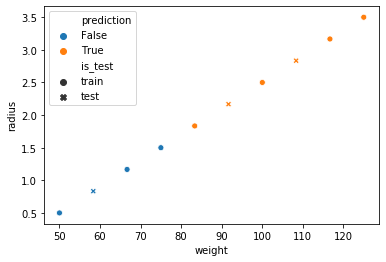

In [41]:
# посмотрим как предсказывает наша модель все данные и отобразим наши множества разными маркерами

sns.scatterplot(x="weight", y="radius", hue="prediction", style="is_test", data=pd.DataFrame({
    "weight": data.weight,
    "radius": data.radius,
    "prediction": model(data.weight, data.radius, a, b, threshold),
    "is_test": [
        "test" if sample_index in test.index else "train" for sample_index in data.index
    ]
}));

## Заключение

В данном курсе мы в основном не будем составлять собственные алгоритмы, а будем пользоваться уже готовыми. Их много, и работают они хорошо в разных случаях. За каждым из них стоит некоторая своя *интуиция*, как в случае алгоритма выше стояла следующая: чем выше размер и вес мангустина - тем он, начиная с некоторого порога, вкусный. 

Другие данные могут давать (совсем) другие подсказки, и поэтому мы уделим внимание и разведочному анализу данных, цель которого - найти эти подсказки в данных и выбрать алгоритм получше. 

Также из основного, следует понимать, что **мы обязаны** проверять качество на тех данных, которые модель не видела, что избежать самообмана. Модели, как и люди, могут запоминать правильные ответы (и далее мы даже увидим построенный на это алгоритм), и ничего ***не обобщать*** *(no generalization)*. Отсутствие обобщения - это то, чего мы будем избегать, стараясь при этом минимизировать ошибку.

# 1.2 Элементы теории вероятностей и математической статистики

Начнем с того, что всё что случайно, как ни странно, случайно по-разному. Например, и монетка, и игральный кубик - с равной вероятностью (еще говорят равномерно) выдают свои исходы. Но, например, попадание выпущенной из лука стрелой "в десяточку" - тяготеет все же к этой самой десяточке, хотя и случайным образом в неё бывает не попадает.

Как и в случае с алгоритмами и моделями, мы в рамках этого курса не будем вдаваться во все математические детали определений (хотя они очень важны). Ограничимся лишь тем, что нам потребуется.

**Случайная величина** - это величина, принимающая какой-либо исход из множества для неё возможных. Например, случайная величина на `(0, 1)` принимает значения только из этого интервала (*непрерывная* случайная величина, её исходы всегда между нулем и единицей). Или, случайная величина может принимать два исхода `{-1; 1}` - *дискретная* случайная величина.

**Вероятность** - это число от 0 до 1 (включительно), характеризующее, условно, как часто мы в конкретный исход попадём, или же насколько *мы верим* в то, что он произойдет (это так, если мы еще ни разу не проводили испытаний).

> Например, для дискретной величины `{-1, 1}`, если вероятность для `-1` равна `0.3`, мы будем считать что это означает, что в 100 испытаниях нам выпадет `-1` как раз 30 раз.
> Для непрерывной, вероятность определяется не в точке, а в луче: вероятность что `величина < 0.5` равна `0.3`, означает что в точках менее 0.5 величина будет в 3 случаях из 10.

Формально, определения немного (если не сказать совершенно) другие. Но для наших нужд данного подхода будет достаточно.

**Функция распределения случайной величины** - описывает как раз все вероятности для всех исходов. То есть `0 < F(x) < 1`, для любого `x` из множества исходов величины. 

Давайте на примерах.

Посмотрим на *равномерно* распределенную на (0, 1) случайную величину. Равномерно, это означает что чем длинее отрезок, тем пропорционально выше вероятность попасть в него.

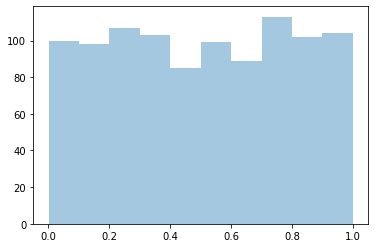

In [50]:
X = [] # массив, где будут наши случайные величины

for index in range(1000): # цикл от 0 до 999
    X.append(np.random.uniform())
    
# и отобразим количество попаданий точки это величины
sns.distplot(
    X,
    kde=False # не делать оценку функции распределения
);

Рассмотрим распределенную на (-Infinity, +Infinity) случайную величину, со средним значением в числе 10, и такую чтобы её значения с 95%-вероятностью попадали в диапазон от +5 до +15. 

Для того, чтобы значения *нормально распределенной случайной величины* (это значит функция распределения имеет определенный заданный вид, пока не суть какой) в 95% случаев лежали в заданном диапазоне `(среднее - L, среднее + L)`, нужно задать её *стандартное отклонение* как `L / 2`.

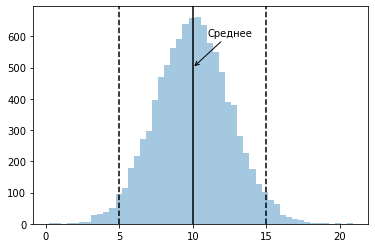

In [104]:
import matplotlib.pyplot as plt
X = [] # массив, где будут наши случайные величины

for index in range(10000): # цикл от 0 до 9999
    X.append(np.random.normal(
        10, # среднее
        2.5 # это половина ширины диапазона        
    ))

# и отобразим количество попаданий точки это величины
sns.distplot(
    X,
    kde=False # не делать оценку функции распределения
);

plt.axvline(10, 0, 1, ls='-', c='black');
plt.axvline(5, 0, 1, ls='--', c='black');
plt.axvline(15, 0, 1, ls='--', c='black');

plt.annotate("Среднее", (10, 500), (11, 600), arrowprops={"arrowstyle": '->'});

In [105]:
# Подсчитаем процент попавших в диапазон от +5 до +15 точек
sum([1 if x >= 5 and x <= 15 else 0 for x in X]) / len(X)

0.9536

Случай дискретных величин выглядит слегка вырожденно.

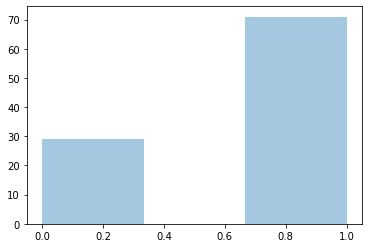

In [94]:
X = []

for index in range(100):
    x = 1 if np.random.uniform() > 0.3 else 0
    X.append(x)
    
sns.distplot(X, kde=False);

**Задача теории вероятностей** - это уметь описывать случайные величины.

**Задача математической статистики** - обратная. По выборке из случайных значений, определить что это за величина (её свойства).
Любая функция от выборки - например среднее значение, или самое часто встречающееся (в статистике - *мода*), - называется *статистикой*.

Анализ данных и машинное обучение - это продолжение статистики. На основе известных данных делаются предположения о поведении целевой величины, что и выражается в виде модели.

## Пример

Представим, что у нас есть замеры роста 300 человек. Мы не знаем что это за случайная величина, но мы можем рассмотреть её различные описательные статистики, и что-то сказать о её поведении.

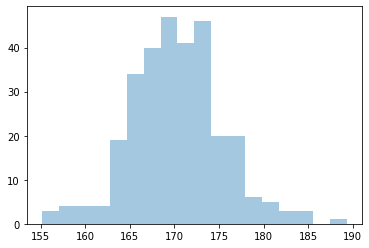

In [101]:
height = [
    np.random.normal(170, 5) for _ in range(300) # синтетические данные
]

sns.distplot(height, kde=False);

### Описательные статистики

In [102]:
pd.DataFrame({'height' : height}).describe().T

,count,mean,std,min,25%,50%,75%,max
height,300.0,170.269254,5.224757,155.153528,166.876336,170.290075,173.346508,189.312969


Здесь мы видим:
- количество (count) записей,
- среднее (mean) для всех замеров роста,
- стандартное отклонение (std) - для нормального распределения, 95% данных лежат в интервале (`среднее - 2 * стандартное отклонение`, `среднее + 2 * стандартное отклонение`),
- 25% данных ниже значения, указанного в столбце 25%
- аналогично с другими процентными значениями (эти статитистики называются процентилями),
- минимум и максимум по всем данным.

### Две важных теоремы

**Закон больших чисел**: если все случайные величины у нас независимы и одинаково распределены, то ***выборочное среднее*** стремится при увеличении числа испытаний к ***математическому ожиданию***.

Математическое ожидание - это взвешенные по вероятностям исходы, то есть

`математическое ожидание = вероятность исхода 1 * значение исхода 1 + вероятность исхода 2 * значение исхода 2 + ....`

По сути, это означает, что в условиях незнания среднего по всем возможным ситуациям (по "всем данным в мире"), мы можем при большом количестве данных заменить его выборочным средним. В нашем при мере с ростом, это означает, что средний рост по всё более увеличивающейся выборке будет ближе к некоторому истинному значению (по "всем данным в мире").

**Центральная предельная теорема**: для независимых случайных величин из одного распределения со средним `M` и стандартным отклонением `S`, их выборочное среднее стремится при увеличении количества испытаний `n` - к нормальному распределению с тем же средним и разбросом `S * S / n`.

Возвращаясь к нашему примеру с ростом, это означает, что по мере роста выборки, средний рост будет распределен как нормальная случайная величина, и чем точнее нам нужно его измерять - тем больше данных нам нужно.

## Заключение

Мы не будем напрямую пользоваться указанными теоремами. Нам важны следствия. 
- Первое следствие - алгоритмы могут (и будут) понимать отданные им данные как случайные выборки из некоторых "всех данных в мире" (генеральной совокупности),
- Второе следствие - чем больше в выборке наблюдений, тем лучше можно оценивать характеристики процесса генерации данных в "этом самом мире" (*data generation process*). И об этом мы еще поговорим.

Тем не менее, важно понимать, что входные данные во всех датасетах практически всегда имеют вероятностную природу. Данные в реальных датасетах - не результат работы математического алгоритма, а результат работы какого-либо станка или экономического механизма или иного процесса, в котором могут случаться различные отклонения. Поэтому идеально подогнать модель под данные так, чтобы вообще не ошибаться, часто нельзя.